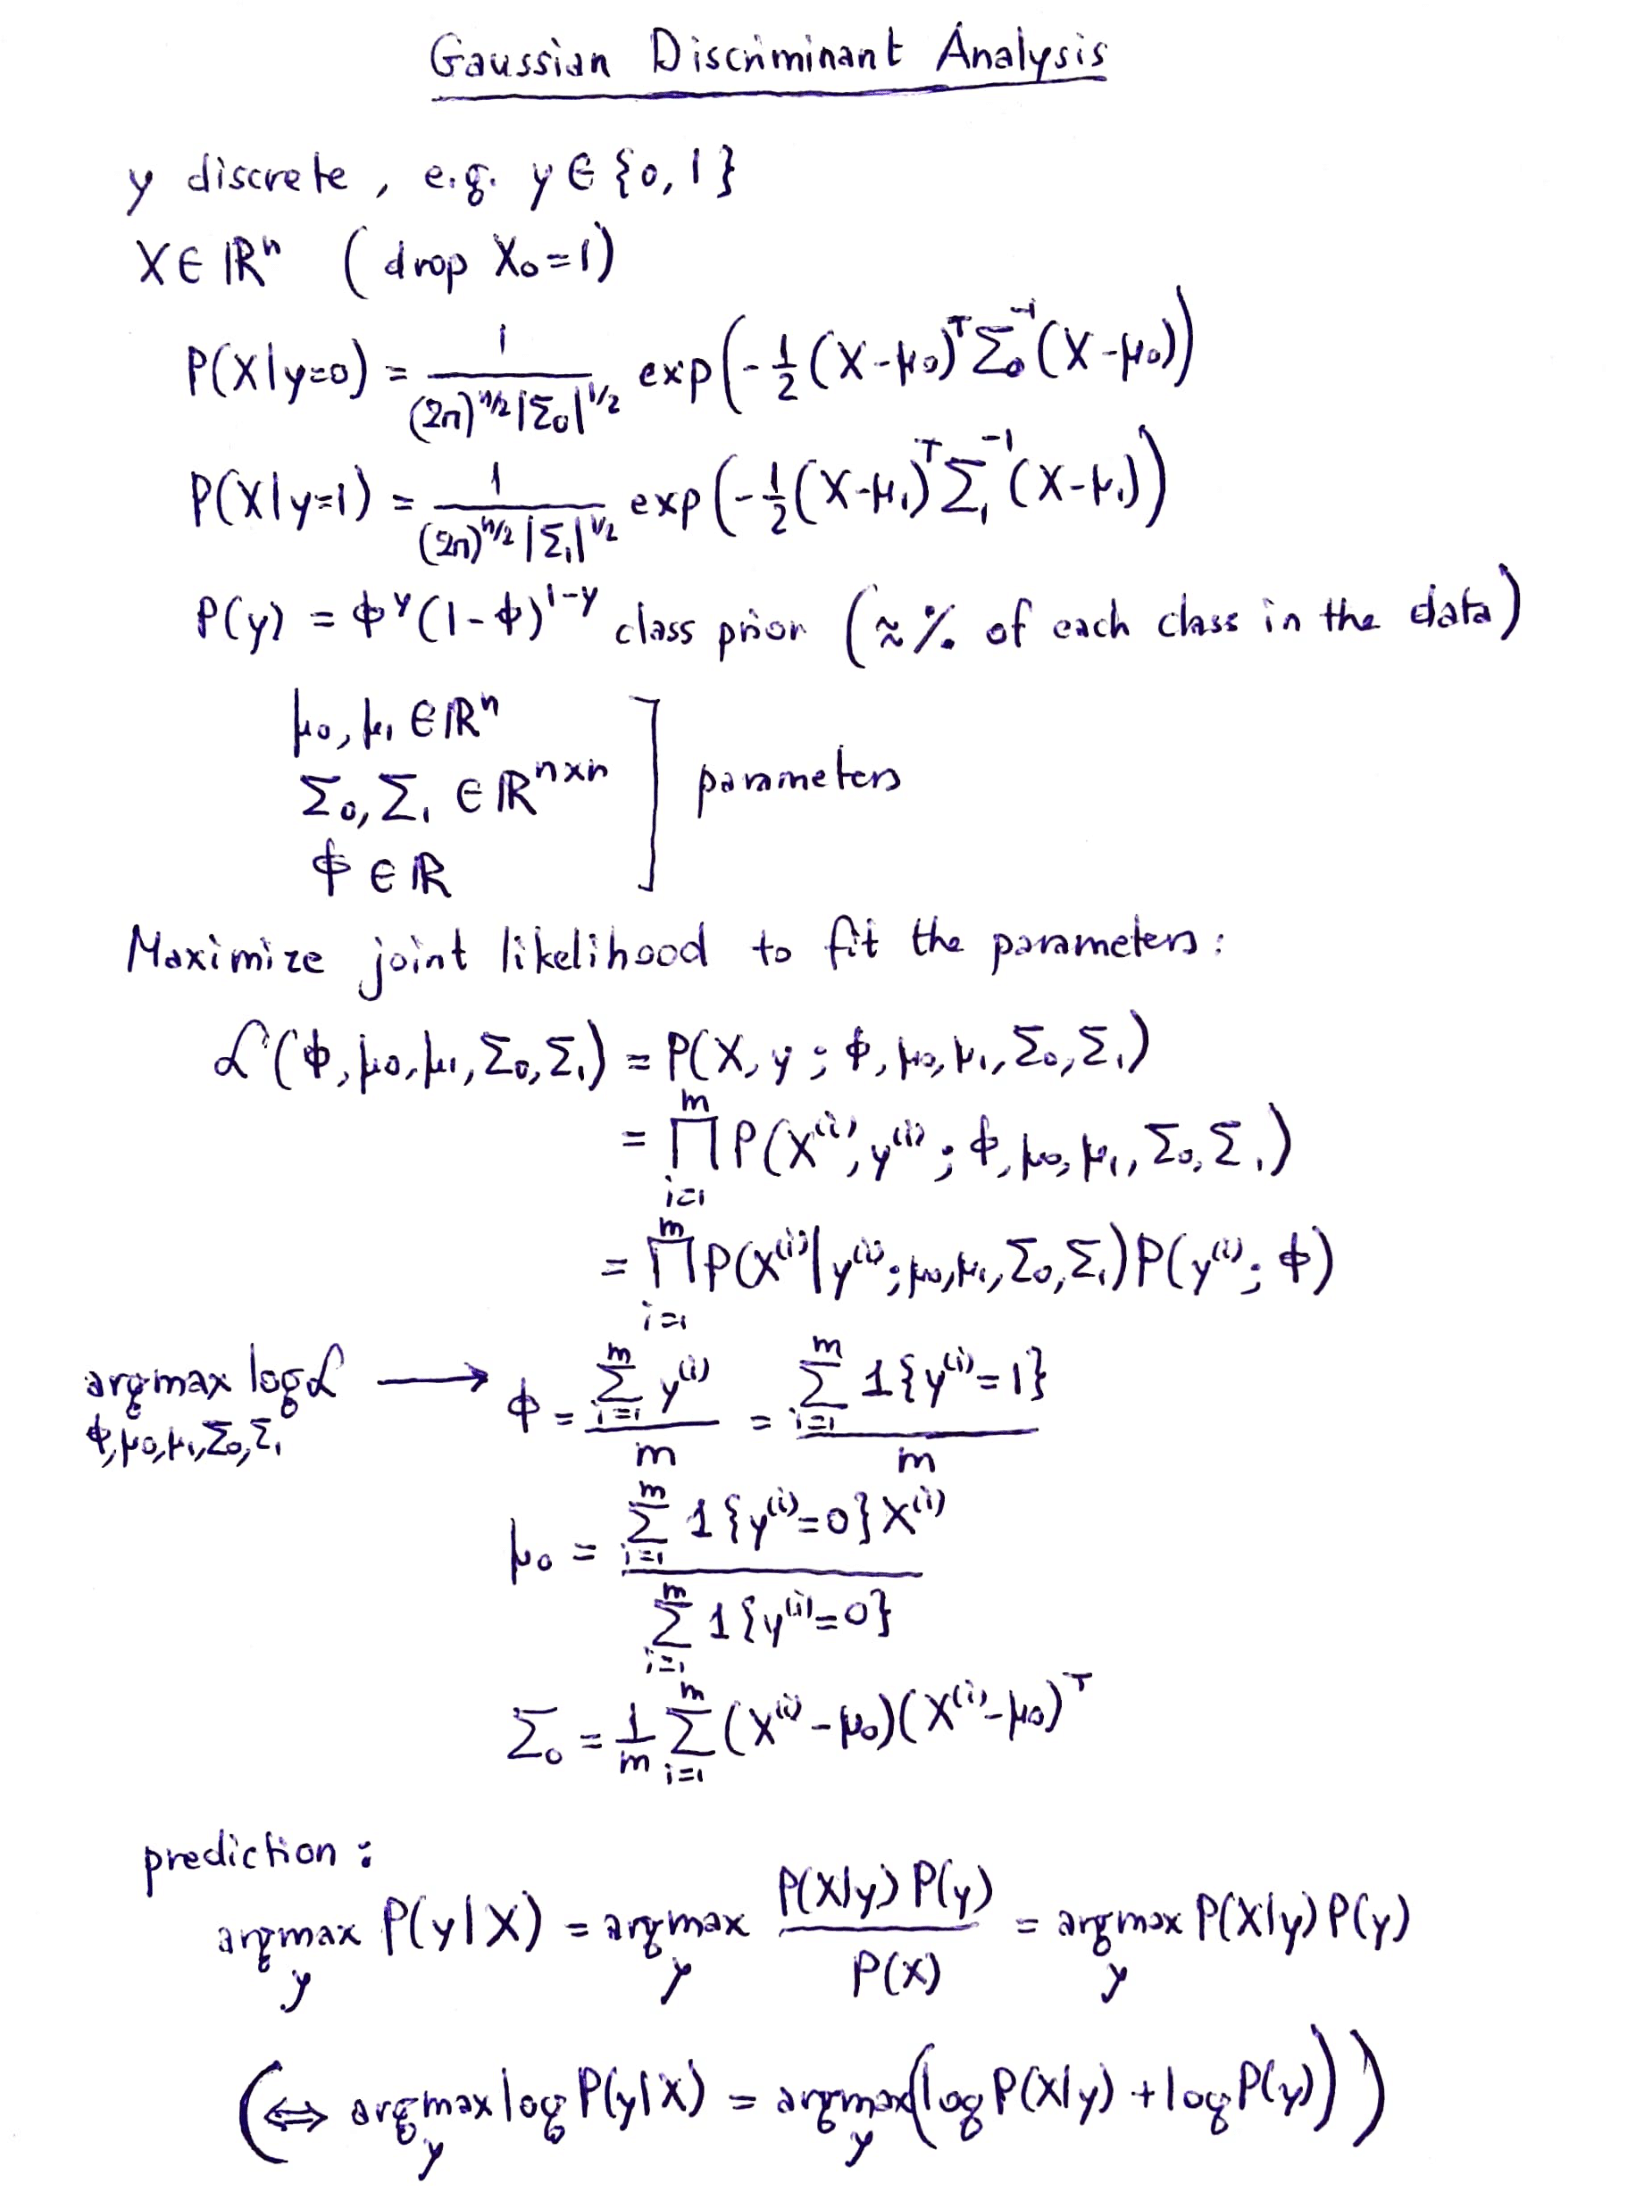

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
# make_blobs(n_samples, centers, cluster_std, random_state) - generate isotropic Gaussian blobs 
#                                                             for clustering
#    n_samples - total number of points equally divided among clusters
#    centers - number of centers to generate
#    random_state - determines the random number generation for dataset creation
#                   pass int for reproducible output accross multiple function call
# returns X, y - X: generated samples, y: integer labels for cluster membership
X, y = make_blobs(n_samples=400, centers=3, cluster_std=4, random_state=123)
X.shape, y.shape

((400, 2), (400,))

In [5]:
np.unique(y)

array([0, 1, 2])

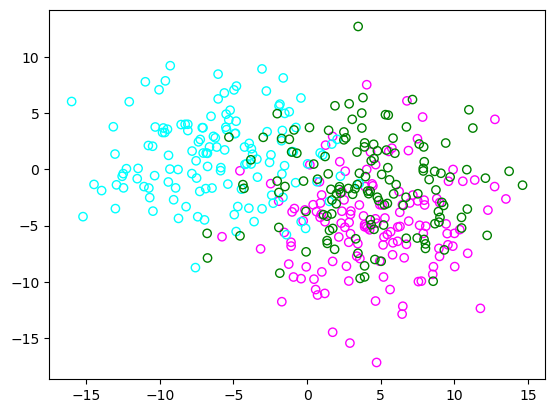

In [6]:
colors = ['magenta', 'cyan', 'green']
for k, color in enumerate(colors):
    # 'edgecolors' - the edge color of the marker
    # 'facecolors' - the face color of the marker
    plt.scatter(X[y == k, 0], X[y == k, 1], facecolors='none', edgecolors=color)

In [10]:
class GDA:
    
    def __init__(self):
        self.prior_prob = dict()
        self.mean_vects = dict()
        self.cov_mats = dict()
        self.det_cov_mats = dict()
        self.inv_cov_mats = dict()
        self.classes = []
        
    def train(self, X, y):
        self.classes = np.unique(y)
        for cl in np.unique(y):
            self.prior_prob[cl] = X[y == cl].shape[0] / X.shape[0]
            self.mean_vects[cl] = np.mean(X[y == cl], axis=0)
            # rowvar=False - each column represents a variable and each row an observation 
            self.cov_mats[cl] = np.cov(X[y == cl], rowvar=False)
            self.det_cov_mats[cl] = np.linalg.det(self.cov_mats[cl])
            self.inv_cov_mats[cl] = np.linalg.inv(self.cov_mats[cl])
            
    def predict(self, X):
        prob_per_cl = []
        for cl in self.classes:
            prob_per_cl.append(np.log(self.prior_prob[cl]) - 0.5*np.log(self.det_cov_mats[cl]) 
                              - 0.5*(X-self.mean_vects[cl]).T @ self.inv_cov_mats[cl]
                              @ (X-self.mean_vects[cl]))
        return np.argmax(prob_per_cl)

In [11]:
model = GDA()
model.train(X, y)

In [12]:
model.prior_prob

{0: 0.335, 1: 0.3325, 2: 0.3325}

In [13]:
model.mean_vects

{0: array([ 4.5266178 , -4.86399597]),
 1: array([-6.08446816,  1.20532741]),
 2: array([ 4.10140312, -1.40902369])}

In [14]:
model.cov_mats

{0: array([[14.91968017,  1.66553162],
        [ 1.66553162, 17.78392294]]),
 1: array([[17.29113274,  0.27028717],
        [ 0.27028717, 12.78665621]]),
 2: array([[18.01224092, -0.5263872 ],
        [-0.5263872 , 16.71403945]])}

In [15]:
min_left = np.min(X[:,0]) 
max_right = np.max(X[:,0])
min_bottom = np.min(X[:,1])
max_top = np.max(X[:,1])
xx, yy = np.meshgrid(np.arange(min_left*1.1, max_right*1.1, 0.5), 
                     np.arange(min_bottom*1.1, max_top*1.1, 0.5))
xx.shape, yy.shape

((66, 68), (66, 68))

In [19]:
# np.reshape(a,newshape)
#   newshape - one shape dimension can be -1; in this case the value is inferred from the length
#              of the array and the remaining dimensions
grid = np.concatenate([xx.reshape(-1,1), yy.reshape(-1,1)], axis=1)
grid.shape

(4488, 2)

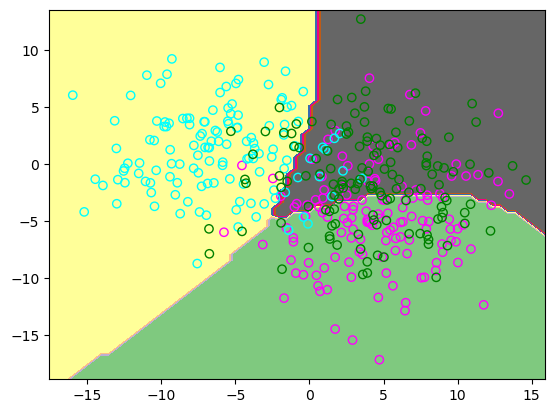

In [21]:
predictions = []
for elem in grid:
    predictions.append(model.predict(elem))
predictions = np.array(predictions).reshape(xx.shape)
# plt.contourf() - plot filled contours 
plt.contourf(xx, yy, predictions, cmap='Accent')
for k, color in enumerate(colors):
    plt.scatter(X[y == k, 0], X[y == k, 1], facecolors='none', edgecolors=color)